# Iris Species Prediction Model

## Import Required Libraries

In [ ]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Prepare Input Data for Deep Learning

Perform the following steps for preparing data

1. Load data into a pandas dataframe
2. Convert the dataframe to a numpy array
3. Scale the feature dataset
4. Use one-hot-encoding for the target variable
5. Split into training and test datasets

In [ ]:
# Load data into a pandas dataframe and review content
iris_data = pd.read_csv('/content/drive/MyDrive/Deep Learning/iris.csv')
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Use label encoder to convert string to numeric values for the target variable
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
iris_data['Species'] = label_encoder.fit_transform(iris_data['Species'])

In [ ]:
# Convert input into numpy array
np_iris = iris_data.to_numpy()

In [ ]:
# Separate input and target variables
X_data = np_iris[:,0:4]
y_data = np_iris[:, 4]

print('Features before scaling:\n')
print(X_data[:5, :])
print('\nTarget before scaling:\n')
print(y_data[:5])

Features before scaling:

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling:

[0. 0. 0. 0. 0.]


In [ ]:
# Create a scaler model that is fit on the input data
scaler = StandardScaler().fit(X_data)

In [ ]:
# Scale the numeric feature variables
X_data = scaler.transform(X_data)

In [ ]:
# Convert target variable as a one-hot encoding array
y_data = tf.keras.utils.to_categorical(y_data, 3)

In [ ]:
print('Features after scaling:\n')
print(X_data[:5, :])
print('\nTarget after one-hot encoding:\n')
print(y_data[:5, :])

Features after scaling:

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Target after one-hot encoding:

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
# Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.10)

print('Train test dimensions:\n')
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Train test dimensions:

(135, 4) (15, 4) (135, 3) (15, 3)


## Creating a model

Creating a model in Keras requires defining the following
1. Number of hidden layers
2. Number of nodes in each layer
3. Activation Functions
4. Loss function and Accuracy measurements

In [ ]:
from tensorflow import keras

# Number of classes in the output layer
NUM_CLASSES = 3

In [ ]:
# Create a sequential model in Keras
model = tf.keras.models.Sequential()

In [ ]:
# Add first hidden layer
model.add(keras.layers.Dense(128,
                             input_shape=(4,),
                             name='Hidden-Layer-1',
                             activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Add second hidden layer
model.add(keras.layers.Dense(128,
                             name='Hidden-Layer-2',
                             activation='relu'))

In [ ]:
# Add an output layer with softmax activation
model.add(keras.layers.Dense(NUM_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

In [ ]:
# Compile the model with loss and metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Print the model meta-data
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,539 (68.51 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

## Training and Evaluating the model
Training the model involves defining various training models and then perform forward and back propagation.

In [ ]:
# Make it verbose so we can see the progress of the training
VERBOSE = 1

In [ ]:
# Setup hyperparameters for training the model

# Set batch size
BATCH_SIZE = 16
# Set number of epochs
EPOCHS = 10
# Set validation split. 20% of the training data will be used for validation after each epoch
VALIDATION_SPLIT = 0.2

Training progress:
Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9048 - loss: 0.2304 - val_accuracy: 0.8519 - val_loss: 0.3124
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8986 - loss: 0.2004 - val_accuracy: 0.8889 - val_loss: 0.2668
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9246 - loss: 0.1865 - val_accuracy: 0.8519 - val_loss: 0.2959
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9035 - loss: 0.2162 - val_accuracy: 0.8519 - val_loss: 0.2568
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9535 - loss: 0.1349 - val_accuracy: 0.8889 - val_loss: 0.2063
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9639 - loss: 0.1459 - val_accuracy: 0.8889 - val_loss: 0.1999
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9522 - loss: 0.1435 - val_accuracy: 0.9259 - val_loss: 0.1753
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9740 - loss: 0.1263 - val_accuracy: 0.9259 - val

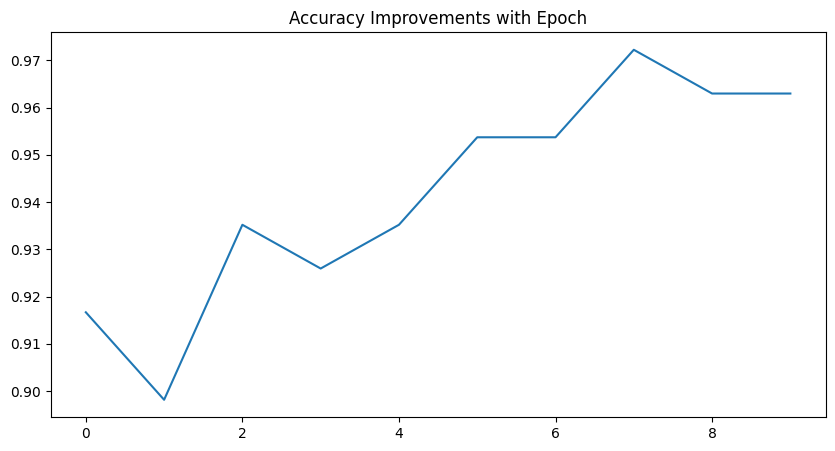

In [ ]:
print('Training progress:')

# Fit the model. This will perform the entire training cycle, including forward propagation, loss computation, back propagation, and gradient descent.
# Execute for the specified batch sizes and epoch
# Perform validation after each epoch

history = model.fit(X_train,
                    y_train,
                    batch_size = BATCH_SIZE,
                    epochs = EPOCHS,
                    verbose = VERBOSE,
                    validation_split = VALIDATION_SPLIT)

print('Accuracy during training:')
import matplotlib.pyplot as plt

# Plot accuracy of model after each epoch
pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy Improvements with Epoch")
plt.show()

In [ ]:
# Evaluate the model with the test dataset and print results
print('Evaluation results:')
model.evaluate(X_test, y_test)

Evaluation results:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0823


[0.08227448910474777, 1.0]

## Saving and Loading Models
The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction.

In [ ]:
# Saving the model
MODEL_DIR = '/content/drive/MyDrive/Deep Learning/iris_model.keras'
model.save(MODEL_DIR)

In [ ]:
# Loading the model
loaded_model = keras.models.load_model(MODEL_DIR)

In [ ]:
# Print model summary
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Hidden-Layer-1 (Dense)               │ (None, 128)                 │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden-Layer-2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output-Layer (Dense)                 │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,080 (137.04 KB)

 Trainable params: 17,539 (68.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,541 (68.52 KB)

## Predictions with Deep Learing Models

In [ ]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

In [ ]:
#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

In [ ]:
#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Raw Prediction Output (Probabilities) : [[0.00731012 0.90719825 0.08549165]]
Prediction is  ['versicolor']
